In [1]:
import matplotlib.pyplot as plt
import numpy as np
from neurodsp.sim import sim_powerlaw
from sklearn.decomposition import PCA
from eigvec.circulant import sim_circulant, compute_epsilon

# Circulant Matrices and Eigendecomposition


PCA is eigendecomposition of a covariance matrix:

$$
\begin{align*}
X^{\top}X = Q \Lambda Q^{\top}
\end{align*}
$$

Let $Q$ be fourier modes (cosines), then the eigenvalues (e.g. fourier coefficients is matrix is circular) is:

$$
\begin{align*}
\Lambda = Q^{\top}(X^{\top}X) Q
\end{align*}
$$

Circulancy of a matrix may be measured using the mean squared error between $\Lambda$ and $\Lambda \odot I$:

$$
\begin{align*}
\epsilon &= \frac{1}{n}||\Lambda - \Lambda \odot I||^2_2.
\end{align*}
$$

$\epsilon \to 0$ indicates a circulant matrix, e.g. cosine eigenvectors, and occurs when the $\Lambda$ is diagonal. Non-zero values in the off-diagonal increases $\epsilon$. 

$\epsilon$ can be computed for any arbitrary matrix and is a measure of whether oscillatory eigenvectors should be expected.

## Temporal Shifts

As shown in Shinn 2023, temporal shifts result in "phantom" oscillitions, thus $\epsilon \to 0$.

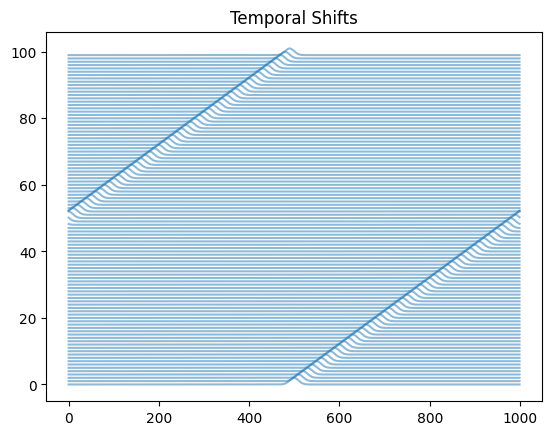

In [2]:
# Simulate temporally shifted gaussians as in Shinn 2024
sigma = 2
x = np.linspace(-100, 100, 1000)
gaussian = 10 * np.exp(-0.5 * (x/sigma)**2) / (sigma * np.sqrt(2 * np.pi))

X = sim_circulant(gaussian)
for i, x in enumerate(X[::10]):
    plt.plot(x+i, color='C0', alpha=.5)

plt.title('Temporal Shifts');

In [3]:
# Error measures
print(f"epsilon X     = {compute_epsilon(X)}")
print(f"epsilon X^T X = {compute_epsilon(np.cov(X.T))}")

epsilon X     = 1.4492430181510616e-32
epsilon X^T X = 3.2193118092902756e-35


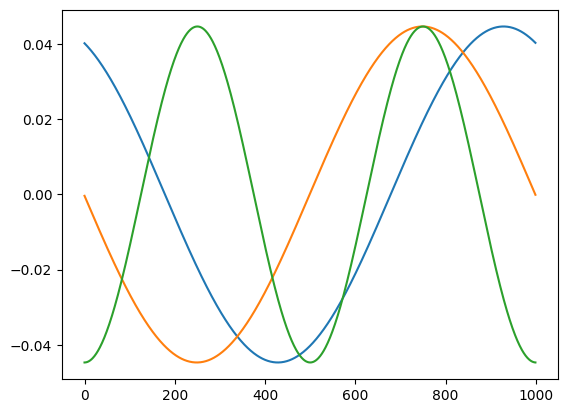

In [4]:
cov = np.cov(X, rowvar=False)
vals, vecs = np.linalg.eig(cov)
plt.plot(vecs.real[:, 0])
plt.plot(vecs.real[:, 1])
plt.plot(vecs.real[:, 2])

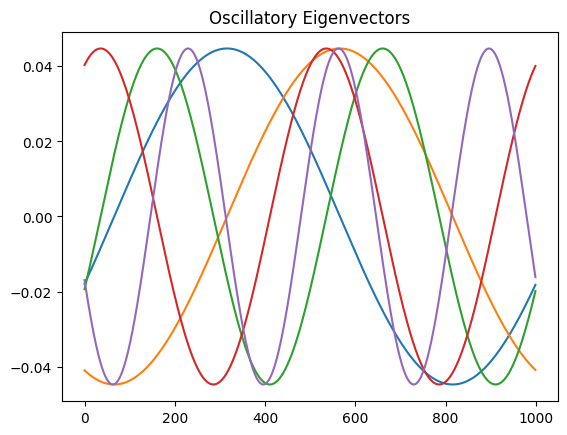

In [5]:
# Oscillatory eigenvectors
pca = PCA()
pca.fit(X)

for eigenvector in pca.components_[:5]:
    plt.plot(eigenvector)

plt.title('Oscillatory Eigenvectors');

## Powerlaws

From Shinn 2023: "phantom oscillations always appear as a 1/f -like pattern which decreases with increasing frequency".

In [6]:
# Simulate powerlaws and stack row-wise
X = np.array([
    sim_powerlaw(1, 1000, exponent=-2)
    for i in range(10000)
])

In [7]:
n = 1000

# Fourier modes (e.g. cosines)
vecs = np.fft.fft(np.eye(n)) / np.sqrt(n)

# Increase number of simulations step-wise
for i in range(1000, len(X), 1000):

    # Error measure
    epsilon = compute_epsilon(np.cov(X[:i].T), vecs=vecs)
    
    print(f"n rows = {i}, epsilon = {epsilon}")

n rows = 1000, epsilon = 0.0003639646665568498
n rows = 2000, epsilon = 0.00020199839124938415
n rows = 3000, epsilon = 0.0001425646136345533
n rows = 4000, epsilon = 0.00010985194754528417
n rows = 5000, epsilon = 7.346840042463523e-05
n rows = 6000, epsilon = 5.756987788217884e-05
n rows = 7000, epsilon = 4.4087709994501274e-05
n rows = 8000, epsilon = 3.5433493513711286e-05
n rows = 9000, epsilon = 2.8672088837113676e-05


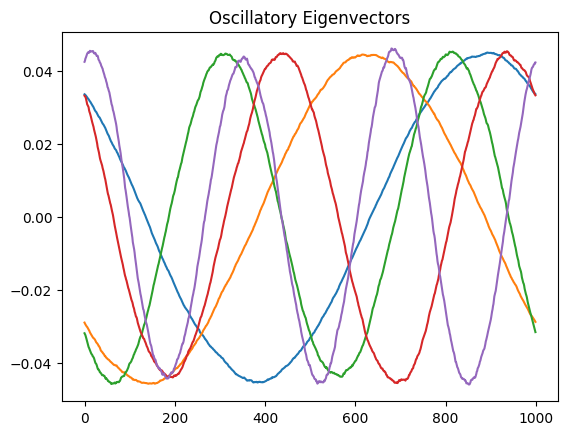

In [8]:
# Oscillatory eigenvectors
pca = PCA()
pca.fit(X)

for eigenvector in pca.components_[:5]:
    plt.plot(eigenvector)

plt.title('Oscillatory Eigenvectors');